In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for gridlines in between values
from matplotlib.ticker import MultipleLocator

In [2]:
df = pd.read_csv('data/spotify_2023_clean.csv', encoding='latin-1', parse_dates=['released_date'])
pd.DataFrame(df.dtypes).T

,track_name,artist,featuring_artists,artist_count,streams,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,released_date
0,object,object,object,int64,int64,int64,object,object,int64,int64,int64,int64,int64,int64,int64,datetime64[ns]


<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 1. Average danceability and energy graphs of Taylor Swift's songs released in same year

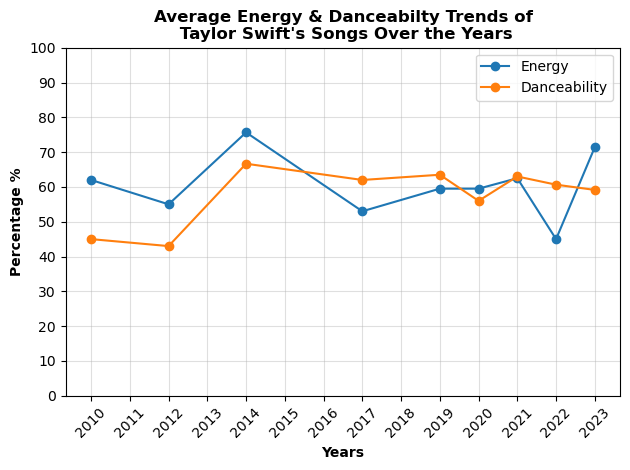

In [3]:
# Pull Taylor's songs from DataFrame and make a copy
ts = df[df['artist']=='Taylor Swift'].copy()

# Create years column and group by years
ts['year'] = ts['released_date'].dt.year
ts_groups = ts.groupby('year')

# Aggregate the data with average metrics for each year
wanted = {'danceability': 'mean', 'energy': 'mean'}
intable_df = ts_groups.agg(wanted).sort_index()    # .astype(int) can be add because they are floats

# Extract values for plotting
years = np.array(intable_df.index)
energy = np.array(intable_df['energy'])
danceability = np.array(intable_df['danceability'])

# Plotting the data
plt.plot(years, energy, marker='o', label='Energy')
plt.plot(years, danceability, marker='o', label='Danceability')

# Customize the plot
plt.ylim(ymin=0, ymax=100)
plt.yticks(np.arange(0, 101, 10))
plt.xticks(np.arange(2010, 2024), rotation=45)

plt.xlabel('Years', fontweight='bold')
plt.ylabel('Percentage %', fontweight='bold')
plt.title("Average Energy & Danceabilty Trends of\n Taylor Swift's Songs Over the Years", fontweight='bold')

plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 2. Total number of listens to songs released between 2010 and 2023

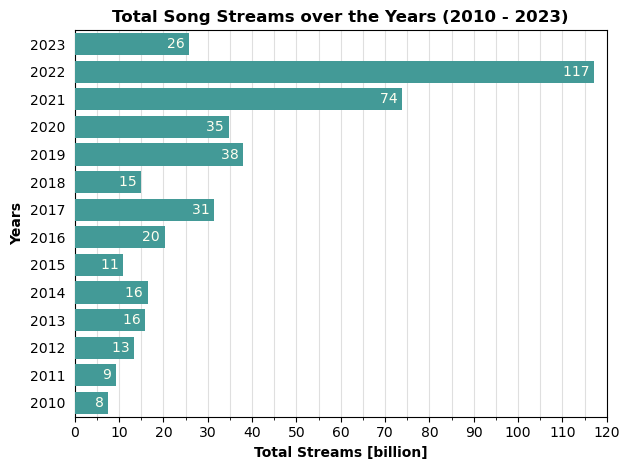

In [4]:
# Create years column
df['year'] = df['released_date'].dt.year

# Group the DataFrame by years, take only streams and calculate the total streams for each group (year)
yearly_groups = df.groupby('year')[['streams']]
intable_df = yearly_groups.sum('streams')

# Filter data for the years between 2010 and 2023 and extract values for plotting
filt = (intable_df.index >= 2010) & (intable_df.index <= 2023)
years = np.array(intable_df.loc[filt].index)
streams = np.array(intable_df.loc[filt]['streams'])

# Visualize data
bars = plt.barh(years, streams, color='#439A97')

# Add text labels for each bar
for bar in bars:
    yval = bar.get_height()
    value = f'{bar.get_width() / 1_000_000_000:.0f} '
    plt.text(bar.get_width(), bar.get_y()+yval/2, value, 
                         va='center', ha='right', zorder=5, color='#FFFFF0')

# Customize the plot
plt.ylim(ymin=2009.5, ymax=2023.5)
plt.yticks(np.arange(2010, 2024))
plt.tick_params(axis='y', which='both', left=False, right=False)    # do not show minor ticks on y axis
plt.xlim(xmin=0, xmax=120_000_000_000)
plt.xticks(np.arange(0, 120_000_000_001, 10_000_000_000), np.arange(0, 121, 10))

plt.ylabel('Years', fontweight='bold')
plt.xlabel('Total Streams [billion]', fontweight='bold')
plt.title("Total Song Streams over the Years (2010 - 2023)", fontweight='bold')

plt.grid(axis='x', alpha=0.4, zorder=0)   # send gridlines to back
[bar.set_zorder(5) for bar in bars]       # bring bars forward

# Set gridlines for between values
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(MultipleLocator(5_000_000_000))
plt.grid(axis='x', alpha=0.4, which='minor')

plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 3. Top 10 artist by total streams

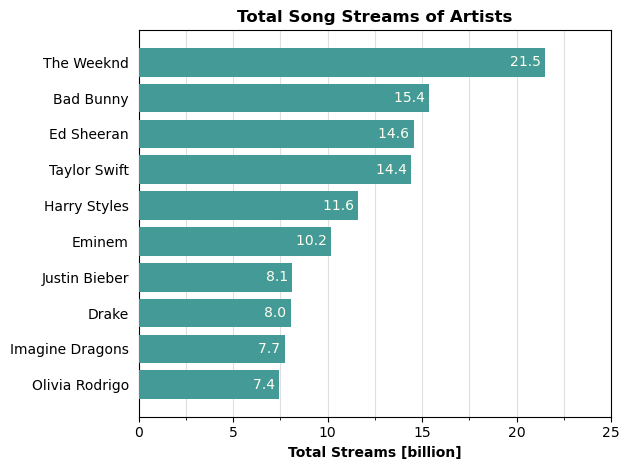

In [5]:
# Group the DataFrame by artists, and calculate the total streams for each group (artist)
groups = df.groupby('artist')
intable_df = groups.sum('streams').nlargest(10, 'streams')[['streams']]

# Filter data for the years between 2010 and 2023 and extract values for plotting
artists = np.array(intable_df.index)[::-1]
streams = np.array(intable_df['streams'])[::-1]

# Visualize data
bars = plt.barh(artists, streams, color='#439A97')

# Add text labels for each bar
for bar in bars:
    yval = bar.get_height()
    value = f'{bar.get_width() / 1_000_000_000:.1f} '
    plt.text(bar.get_width(), bar.get_y()+yval/2, value,
                        va='center', ha='right', zorder=10, color='#FFFFF0')


# Customize the plot
plt.tick_params(axis='y', which='both', left=False, right=False)    # do not show minor ticks on y axis
plt.xlim(xmin=0, xmax=25_000_000_000)
plt.xticks(np.arange(0, 25_000_000_001, 5_000_000_000), np.arange(0, 26, 5))

plt.xlabel('Total Streams [billion]', fontweight='bold')
plt.title("Total Song Streams of Artists", fontweight='bold')

plt.grid(axis='x', alpha=0.4, zorder=0)   # send gridlines to back
[bar.set_zorder(5) for bar in bars]       # bring bars forward

# Set gridlines for between values
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(MultipleLocator(2_500_000_000))
plt.grid(axis='x', alpha=0.4, which='minor')

plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 4. Averge energy, valence and liveness for whloe, top 10 and least 10 lists

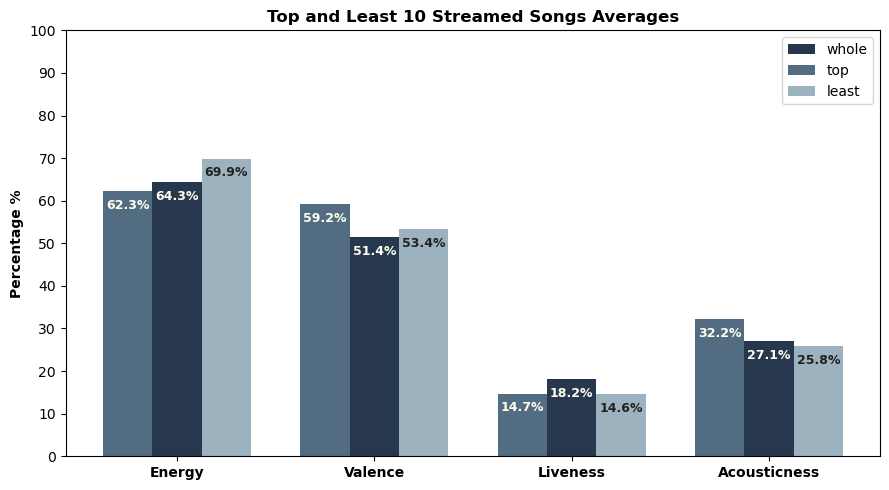

In [6]:
# KEEP IN MIND THIS DATA HAS ONLY MOST STREAMED SONGS

# Get the top 10 and least 10 streamed songs data
top10_df = df.nlargest(10, 'streams')
least10_df = df.nsmallest(10, 'streams')

# Define the auido features to analyze
wanted = ['Energy', 'Valence', 'Liveness', 'Acousticness']

# Calculate the mean of each feature for the entire dataset, top 10 and least 10
whole = [df[x.lower()].mean() for x in wanted]
tops = [top10_df[x.lower()].mean() for x in wanted]
leasts = [least10_df[x.lower()].mean() for x in wanted]

# Set up the x-axis indexes, to prevent overlapping
x_indexes = np.arange(len(wanted))
width = 0.25    # 0.4 for two

# Create subplots, we will need ax.barlabel to show values of each bar
fig, ax = plt.subplots(figsize=(9,5))

# Create bar plots
w_bars = plt.bar(x_indexes, whole, width=width, color='#27374D', label='whole')
t_bars = plt.bar(x_indexes-width, tops, width=width, color='#526D82', label='top')
l_bars = plt.bar(x_indexes+width, leasts, width=width, color='#9DB2BF', label='least')

# Customize the plot
# Add labels with percentage
ax.bar_label(w_bars, fmt='%.1f%%', label_type='edge', padding=-15, fontsize=9, fontweight='bold', color='#FFFFF0')
ax.bar_label(t_bars, fmt='%.1f%%', label_type='edge', padding=-15, fontsize=9, fontweight='bold', color='#FFFFF0')
ax.bar_label(l_bars, fmt='%.1f%%', label_type='edge', padding=-15, fontsize=9, fontweight='bold', color='#212121')

plt.yticks(np.arange(0,101,10))
plt.xticks(ticks=x_indexes, labels=wanted, fontweight='bold')

plt.ylabel('Percentage %', fontweight='bold')
plt.title("Top and Least 10 Streamed Songs Averages", fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 5. Stream values over valence

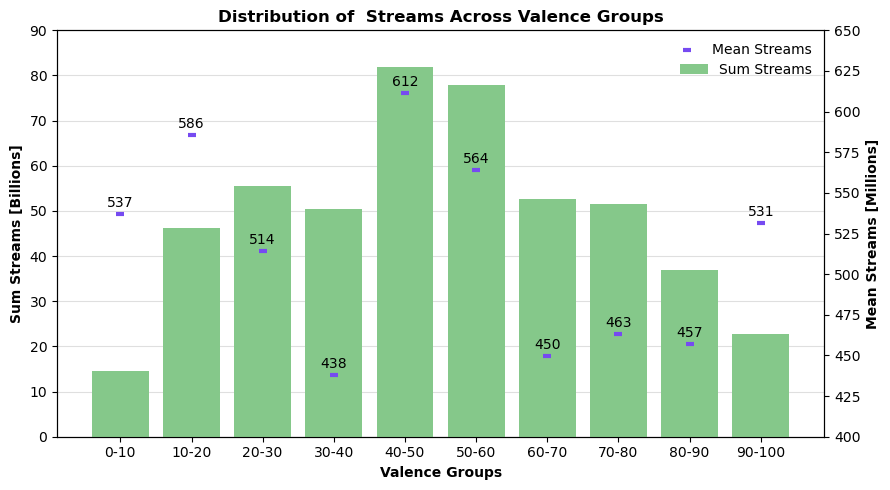

In [7]:
# Initialize lists
sums, means, valences = [], [], []
for i in range(0, 100, 10):
    # Create filter for valence groups
    filt = (df['valence'] > i) & (df['valence'] <= i+10)
    # Calculate and append values
    sums.append(df[filt]['streams'].sum())
    means.append(df[filt]['streams'].mean())
    valences.append(f'{i}-{i+10}')


# Create subplot, we will need 2 y axis for each plot
fig, ax1 = plt.subplots(figsize=(9,5))

# Create bar chart for sums data
ax1.bar(valences, sums, color='#85C88A', zorder=10, label='Sum Streams')
# Create a new axis for second plot
ax2 = ax1.twinx()
# Create scatter plot for means data
ax2.scatter(valences, means, color='#764AF1', marker='_', linewidth=3, label='Mean Streams')
# Annotate mean stream values on the scatter plot
for i, value in enumerate(means):
    plt.annotate(f'{value/1_000_000:.0f}', (valences[i], means[i]), textcoords='offset points', xytext=(0,5), ha='center')


# Customize the plot
# Set labels
ax1.set_xlabel('Valence Groups', fontweight='bold')
ax1.set_ylabel('Sum Streams [Billions]', fontweight='bold')
ax2.set_ylabel('Mean Streams [Millions]', fontweight='bold')
plt.title('Distribution of  Streams Across Valence Groups', fontweight='bold')

ax1.grid(axis='y', alpha=0.4)

# Arrange axes visual values
ax1.set_yticks(np.arange(0, 90_000_000_001, 10_000_000_000), np.arange(0, 91, 10))
ax2.set_yticks(np.arange(400_000_000, 650_000_001, 25_000_000), np.arange(400, 651, 25))
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.95), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False)

plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 6. Stream values over energies

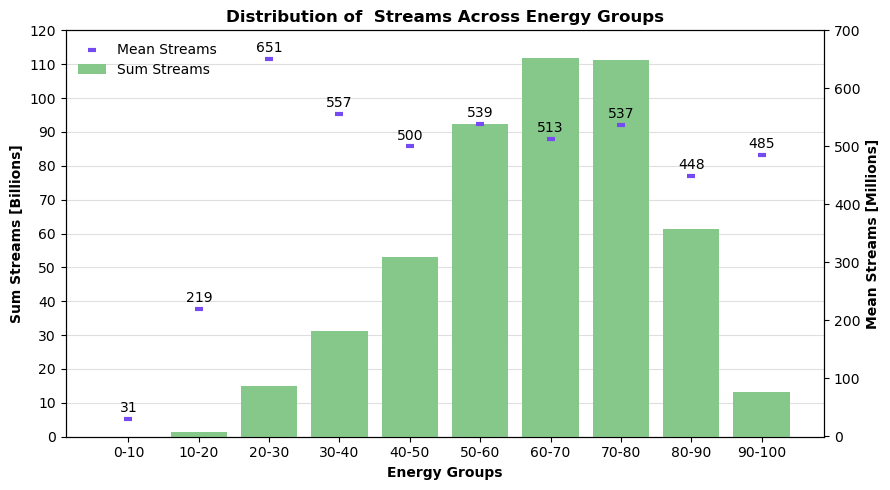

In [8]:
# Initialize lists
sums, means, energies = [], [], []
for i in range(0, 100, 10):
    # Create filter for valence groups
    filt = (df['energy'] > i) & (df['energy'] <= i+10)
    # Calculate and append values
    sums.append(df[filt]['streams'].sum())
    means.append(df[filt]['streams'].mean())
    energies.append(f'{i}-{i+10}')


# Create subplot, we will need 2 y axis for each plot
fig, ax1 = plt.subplots(figsize=(9,5))

# Create bar chart for sums data
ax1.bar(energies, sums, color='#85C88A', zorder=10, label='Sum Streams')
# Create a new axis for second plot
ax2 = ax1.twinx()
# Create scatter plot for means data
ax2.scatter(energies, means, color='#764AF1', marker='_', linewidth=3, label='Mean Streams')
# Annotate mean stream values on the scatter plot
for i, value in enumerate(means):
    plt.annotate(f'{value/1_000_000:.0f}', (energies[i], means[i]), textcoords='offset points', xytext=(0,5), ha='center')


# Customize the plot
# Set labels
ax1.set_xlabel('Energy Groups', fontweight='bold')
ax1.set_ylabel('Sum Streams [Billions]', fontweight='bold')
ax2.set_ylabel('Mean Streams [Millions]', fontweight='bold')
plt.title('Distribution of  Streams Across Energy Groups', fontweight='bold')

ax1.grid(axis='y', alpha=0.4)

# Arrange axes visual values
ax1.set_yticks(np.arange(0, 120_000_000_001, 10_000_000_000), np.arange(0, 121, 10))
ax2.set_yticks(np.arange(0, 700_000_001, 100_000_000), np.arange(0, 701, 100))
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.95), frameon=False)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 7. Characteristics of Taylor Swift's songs

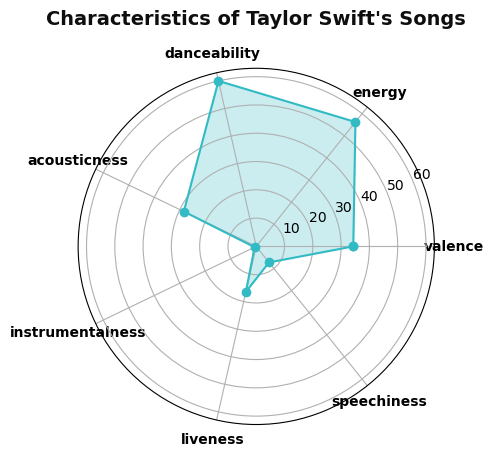

In [9]:
# We already have Taylor Swift's data frame as ts

# Calculate the wanted values
categories = ['valence','energy',  'danceability', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
means = [round(ts[x].mean(), 2) for x in categories]

# Calculate angles
num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Draw lines one by one 
means += means[:1]
angles += angles[:1]

# Draw spiderchart
plt.figure(figsize=(5, 5))
plt.polar(angles, means, marker='o', color='#33BBC5')
plt.fill(angles, means, alpha=0.25, color='#33BBC5', edgecolor='#33BBC5')

# Add categories and title
plt.xticks(angles[:-1], categories, fontweight='bold')
plt.title("Characteristics of Taylor Swift's Songs", size=14, fontweight='bold', color='#0F0E0E', y=1.1)

plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>

#### 8. Compare musical characteristics of Taylor Swift and Eminem

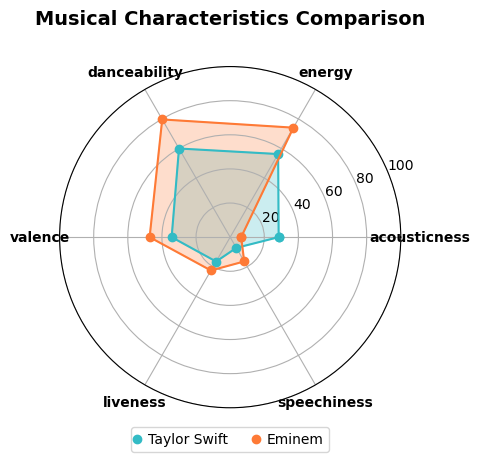

In [10]:
# We already have Taylor Swift's data frame as ts
# Create dataframe for Eminem
em = df[df['artist']=='Eminem'].copy()

# Calculate the mean values for selected features
categories = ['acousticness', 'energy', 'danceability', 'valence', 'liveness', 'speechiness']
ts_means = [round(ts[x].mean(), 2) for x in categories]
em_means = [round(em[x].mean(), 2) for x in categories]

# Evenly space angles in radians based on the number of categories
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

# Add first value to the end of the list to complete the spider chart
ts_means.append(ts_means[0])
em_means.append(em_means[0])
angles.append(angles[0])

# Draw spiderchart
ax = plt.subplot(111, projection='polar')
ax.plot(angles, ts_means, marker='o', color='#33BBC5', label='Taylor Swift')
ax.fill(angles, ts_means, alpha=0.25, color='#33BBC5', edgecolor='#33BBC5')
ax.plot(angles, em_means, marker='o', color='#FE7A36', label='Eminem')
ax.fill(angles, em_means, alpha=0.25, color='#FE7A36', edgecolor='#FE7A36')

# Customize the plot
ax.set_ylim(0, 100)
# ax.set_yticklabels([]) # to hide y values

plt.xticks(angles[:-1], categories, fontweight='bold')
plt.title("Musical Characteristics Comparison", size=14, fontweight='bold', y=1.1)

plt.legend(loc='lower center', handlelength=0, ncol=2, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()

<p style="background-image: linear-gradient(to right, #0D9276, #41b675)"> &nbsp </p>